In [1]:
import numpy as np
import matplotlib.pyplot as plt

Potential with `Rotation` (yz term) and `Squeeze` ($y^2-z^2$ term):
$$
\Phi = a(y^2+z^2)+2byz+c(y^2-z^2)
$$
Diagnalize this function we can get the eigenvalues (mode frequency) and eigenvectors (rotated axis):

Eigenvalues:
$$
\omega_1^2 = a-\sqrt{b^2+c^2}\\
\omega_2^2 = a+\sqrt{b^2+c^2}
$$
Eigenvectors:
$$
v_1 = \{\frac{c-\sqrt{b^2+c^2}}{b}, 1\}\\
v_2 = \{\frac{c+\sqrt{b^2+c^2}}{b}, 1\}
$$

In [14]:
## Red chamber
# a = 1.78**2 # secular freq = 1.78MHz
a = 1.765**2 # secular freq = 1.78MHz

In [15]:
b_list = [-0.3, -0.1, 0.1, 0.3, 0.8, 0.9, 1, 1.1, 1.2]
w1_dt = [1.68, 1.735, 1.748, 1.705, 1.5112, 1.4811, 1.4462, 1.4102, 1.3791]
w2_dt = [1.875, 1.83, 1.832, 1.88, 1.9961, 2.0232, 2.0499, 2.0781, 2.1053]

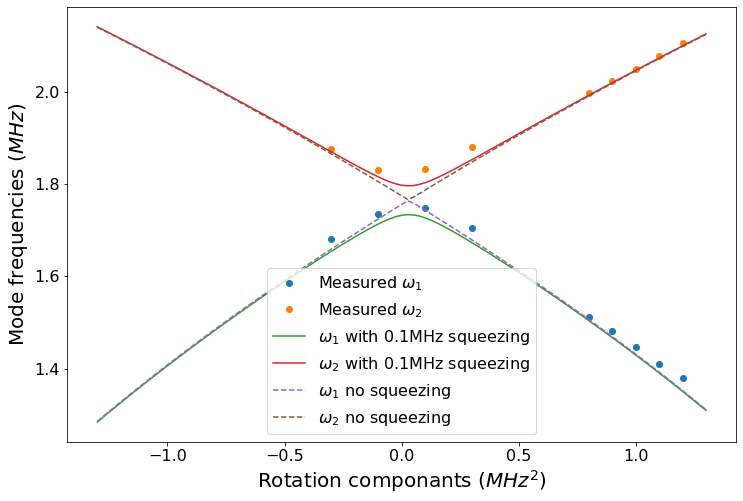

In [20]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## For Red chamber, we want the axis is 45 degree, so we apply the rotation and want the squeeze to be zero.
b_ls = np.linspace(-1.3, 1.3, 101)
offset = 0.03
slope = 1.1
c = 0.1
w1_0 = []
w2_0 = []
w1 = []
w2 = []
for b in b_ls:
    w1_0.append(np.sqrt(a-slope*np.sqrt((b-offset)**2)))
    w2_0.append(np.sqrt(a+slope*np.sqrt((b-offset)**2)))
    w1.append(np.sqrt(a-slope*np.sqrt((b-offset)**2+c**2)))
    w2.append(np.sqrt(a+slope*np.sqrt((b-offset)**2+c**2)))
plt.figure(figsize = (12,8))
plt.plot(b_list, w1_dt,'o', label = r'Measured $\omega_1$')
plt.plot(b_list, w2_dt,'o', label = r'Measured $\omega_2$')
plt.plot(b_ls, w1, label = r'$\omega_1$ with 0.1MHz squeezing')
plt.plot(b_ls, w2, label = r'$\omega_2$ with 0.1MHz squeezing')
plt.plot(b_ls, w1_0, '--', label = r'$\omega_1$ no squeezing')
plt.plot(b_ls, w2_0, '--', label = r'$\omega_2$ no squeezing')
plt.xlabel(r'Rotation componants ($MHz^2$)')
plt.ylabel(r'Mode frequencies ($MHz$)')
plt.legend()

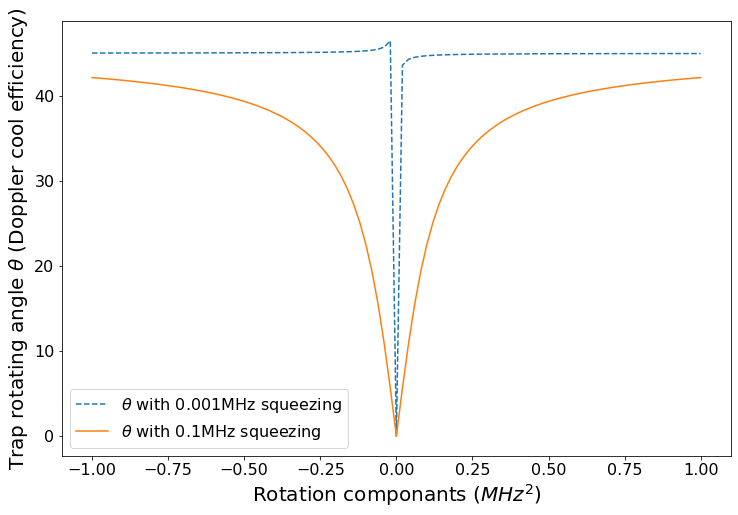

In [27]:
b_ls = np.linspace(-1, 1, 101)
c = 0.1
theta_0 = []
theta = []
for b in b_ls:
    theta_0.append(np.arctan(b/(0.001+b))*180/np.pi)
    theta.append(abs(np.arctan(b/(c+np.sqrt(b**2+c**2)))*180/np.pi))
plt.figure(figsize = (12,8))
plt.plot(b_ls, theta_0,'--', label = r'$\theta$ with 0.001MHz squeezing')
plt.plot(b_ls, theta, label = r'$\theta$ with 0.1MHz squeezing')
plt.xlabel(r'Rotation componants ($MHz^2$)')
plt.ylabel(r'Trap rotating angle $\theta$ (Doppler cool efficiency)')
plt.legend()